## <font color='tag:blue'>Projeto 2</font>

## <font color='tag:blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [3]:
# Carrega o dataset (que já foi limpo para o projeto)
df_dsa = pd.read_csv('dados/dataset.csv')

In [4]:
# Shape
df_dsa.shape

(9700, 11)

In [5]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
# Resumo estatístico se aplica para variáveis numéricas, mas não para categóricas.
# O Segundo quartil equivale à MEDIANA
# Como a MEDIANA está bem diferente da média, podemos previamente inferir que há ouliers para cima
# Esses outliers "empurram" a média para cima.
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
# Conferindo as variáveis categóricas deste campo e o número de ocorrências
df_dsa.Categoria.value_counts()

Office Supplies    5851
Furniture          2055
Technology         1794
Name: Categoria, dtype: int64

In [14]:
# Podemos filtrar, para ter uma base exploratória, do volume vendido por "Categoria" de produto e por 'Cidade'
df_dsa[["Categoria","Cidade","Valor_Venda"]].groupby(['Categoria', 'Cidade']).sum()

Valor_Venda
Categoria  Cidade                 
Furniture  Akron          433.5960
           Alexandria     267.4600
           Allen          244.0060
           Allentown       11.6480
           Amarillo      3048.5828
...                            ...
Technology Wichita        224.7500
           Wilmington    1786.3760
           Woodland       239.9840
           Yonkers       6140.2200
           Yuma           785.5130

[1185 rows x 1 columns]

In [15]:
# Podemos aplicar o método sort, e já termos essa resposta, visualmente, dentro do nosso filtro.
df_dsa[["Categoria","Cidade","Valor_Venda"]].groupby(['Categoria', 'Cidade']).sum().sort_values(by='Valor_Venda', ascending=False)

,,Valor_Venda
Categoria,Cidade,
Technology,New York City,108890.166
Furniture,New York City,74496.239
Technology,Los Angeles,72109.912
Office Supplies,New York City,68362.814
Furniture,Los Angeles,52446.621
...,...,...
Office Supplies,Jupiter,2.064
Technology,Sheboygan,1.980
Office Supplies,Elyria,1.824


> Ou seja, a resposta é New York City, com o Valor_Venda de 68362.814.

Mas podemos tentar fazer de uma forma que fique visualmente mais clara para apresentar para um cliente.

In [16]:
# Como devemos localizar a cidade com o maior 'Valor_Venda' da 'Categoria' 'Office Supplies'
# Podemos agrupar primeiro apenas as ocorrências nessa Categoria.
df_agrupado = df_dsa[df_dsa['Categoria'] == 'Office Supplies']
df_agrupado.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900


In [17]:
# Depois, podemos agrupar os resultados por cidade (Somando a coluna "Valor_Venda" de cada Cidade)
df_vendas = df_agrupado.groupby('Cidade')['Valor_Venda'].sum().to_frame()

In [18]:
# Por último, retornamos a Series anterior, ordenando a partir do maior valor
df_vendas.sort_values(by='Valor_Venda', ascending=False)

,Valor_Venda
Cidade,
New York City,68362.814
Los Angeles,47098.100
San Francisco,41771.198
Seattle,34856.878
Philadelphia,29313.687
...,...
Ormond Beach,2.808
Pensacola,2.214
Jupiter,2.064


In [19]:
# Poderia ser ainda mais prático, já retornando somente a linha de interesse:
df_vendas.sort_values(by='Valor_Venda', ascending=False).head(1)

,Valor_Venda
Cidade,
New York City,68362.814


In [20]:
# Ou ainda
df_cidade = df_vendas.sort_values(by='Valor_Venda', ascending=False)
df_cidade.iloc[0]

Valor_Venda    68362.814
Name: New York City, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [21]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], format='%d/%m/%Y')

In [22]:
# Criando uma pd.Series com o "Valor_Venda" por data e adicionando um índice (para facilitar a manipulação)
df_data = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum().to_frame()
df_data.sort_values(by='Data_Pedido')


,Valor_Venda
Data_Pedido,
2015-01-03,16.4480
2015-01-04,288.0600
2015-01-05,19.5360
2015-01-06,4407.1000
2015-01-07,87.1580
...,...
2018-12-26,814.5940
2018-12-27,177.6360
2018-12-28,1657.3508


<Axes: xlabel='Data_Pedido'>

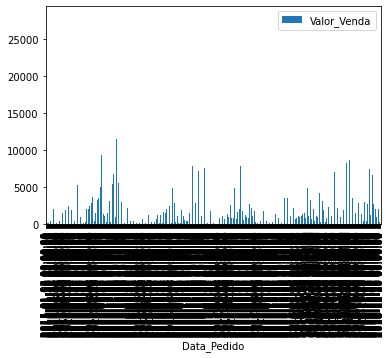

In [23]:
# Se fossemos fazer um único gráfico simples a partir dessa Series, ficaria muito poluido.
df_data.plot.bar()

Como nossa série história compreende 4 anos de dados, temos algumas alternativas:

> podemos classificá-lo por períodos, de forma a permitir uma visualização mais adequada. Podemos agrupar (acumular) os dados por ano, por semestre, ou por mês, por exemplo, gerando um único gráfico com todos os valores.

> podemos ainda gerar um gráfico para cada mês da nossa série histórica, compreendendo assim o 'Valor_Venda' para cada data individualmente.

In [24]:
# Criando um DataFrame com os resultados anuais de vendas
df_year = df_data.resample('Y').sum()
df_year

,Valor_Venda
Data_Pedido,
2015-12-31,470768.6001
2016-12-31,454072.5154
2017-12-31,595365.9240
2018-12-31,715350.9152


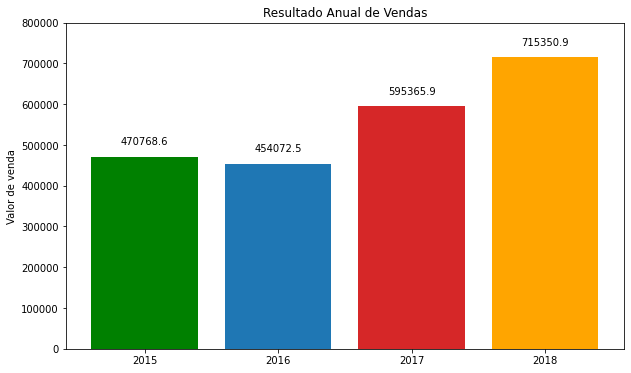

In [25]:
# Gráfico com o acumulado anual de vendas
# Usando o matplotlib.pyplot.subplots

fig, ax = plt.subplots(figsize=(10,6))

years = ["2015", "2016", "2017", "2018"]
sells = df_year['Valor_Venda']
bar_colors = ['green', 'tab:blue', 'tab:red', 'orange']

bars = ax.bar(years, sells, color=bar_colors)

# Adicionando rótulo das barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 10),  # offset do texto sobre a barra
                textcoords="offset points", ha='center', va='bottom')


ax.set_ylabel('Valor de venda')
ax.set_title('Resultado Anual de Vendas')
ax.set_ylim(0, 800000)

plt.show()

In [26]:
# Criando o Dataframe com os resultados Trimestrais
df_quarter = df_data.resample('Q').sum()
df_quarter

,Valor_Venda
Data_Pedido,
2015-03-31,73370.8460
2015-06-30,84977.1536
2015-09-30,137630.7423
2015-12-31,174789.8582
2016-03-31,62075.3710
2016-06-30,87049.3230
2016-09-30,128560.2072
2016-12-31,176387.6142
2017-03-31,92109.7690


In [27]:
df_quarter['Valor_Venda'][2:16:4]

Data_Pedido
2015-09-30    137630.7423
2016-09-30    128560.2072
2017-09-30    136762.2682
2018-09-30    192864.9100
Freq: 4Q-DEC, Name: Valor_Venda, dtype: float64

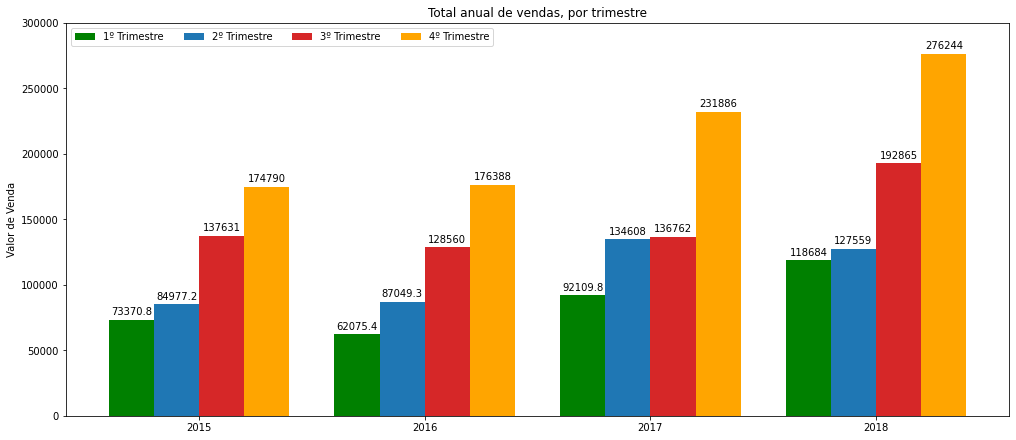

In [28]:
# Plotando gráfico de barras com o volume de vendas por ano e por trimestre.

years = ("2015", "2016", "2017", "2018")
trimestrais = {
    '1º Trimestre': (df_quarter['Valor_Venda'][0:16:4]),
    '2º Trimestre': (df_quarter['Valor_Venda'][1:16:4]),
    '3º Trimestre': (df_quarter['Valor_Venda'][2:16:4]),
    '4º Trimestre': (df_quarter['Valor_Venda'][3:16:4]),
}

x = np.arange(len(years))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(14,6))

for attribute, measurement in trimestrais.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=bar_colors[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Valor de Venda')
ax.set_title('Total anual de vendas, por trimestre')
ax.set_xticks(x + (width*1.5), years)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 300000)

plt.show()

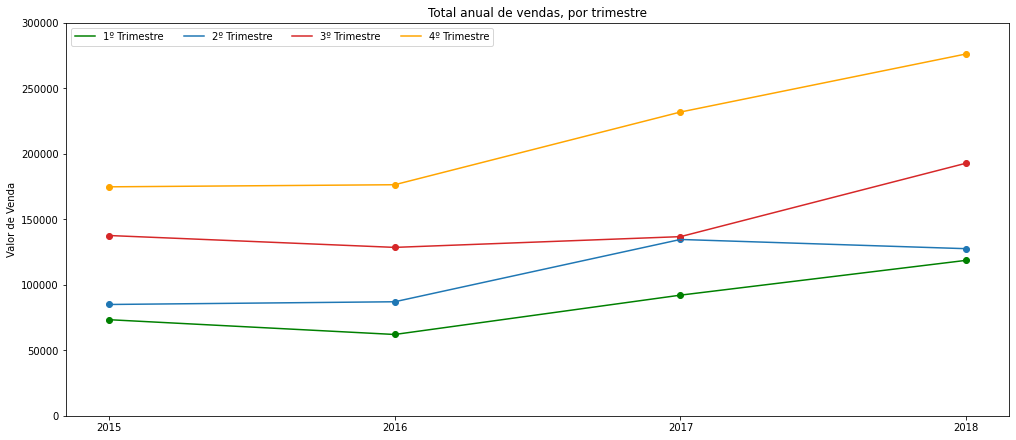

In [29]:
# Pode-se plotar as vendas trimestrais com linhas, comparando cada período a seu correspondente, por ano.
# enfatizando ainda que as vendas aumentam com o decorrer do ano, e o maior volume de venda nos trimestres finais.
# Fazer estes comentários em markdown.

x = np.arange(len(years))  # the label locations
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(14,6))

for attribute, measurement in trimestrais.items():
    ax.plot(x, measurement, label=attribute, color=bar_colors[multiplier])
    ax.scatter(x, measurement, color=bar_colors[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Valor de Venda')
ax.set_title('Total anual de vendas, por trimestre')
ax.set_xticks(x, years)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 300000)

plt.show()

In [30]:
# Agrupando o Valor de Venda por semana
df_monthly = df_data.resample('M').sum()
df_monthly

,Valor_Venda
Data_Pedido,
2015-01-31,14205.7070
2015-02-28,3959.3420
2015-03-31,55205.7970
2015-04-30,27336.6230
2015-05-31,23457.3950
2015-06-30,34183.1356
2015-07-31,31124.8270
2015-08-31,25700.1865
2015-09-30,80805.7288


Text(0.5, 1.0, 'Vendas Mensais - 2018')

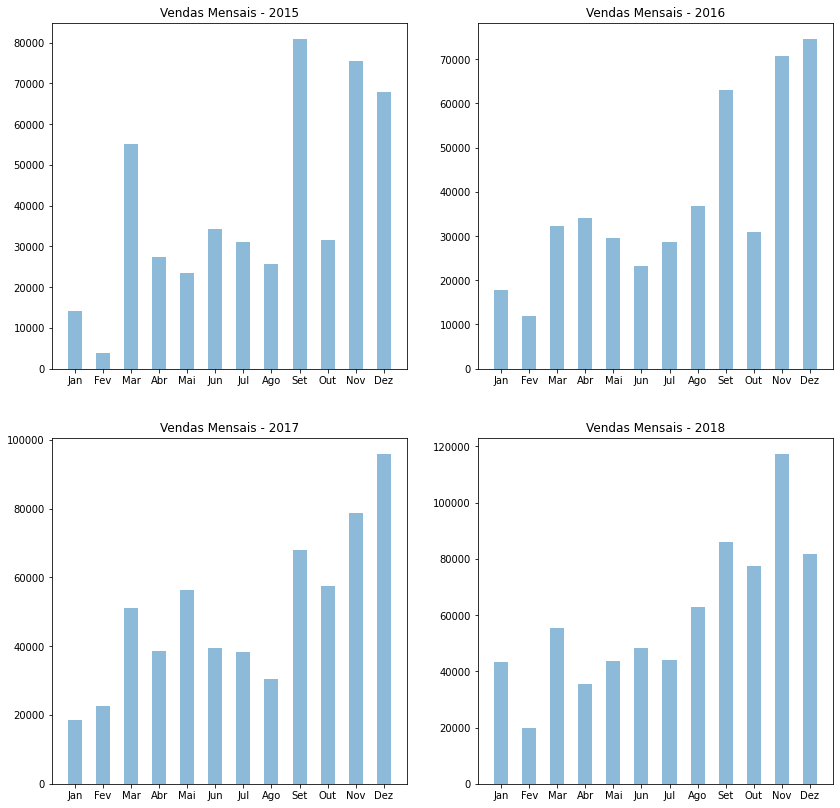

In [31]:
# Plotando o resultado de vendas por mês, sendo um gráfico para cada ano.
months = np.array(["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"])
dict_sells_per_year = {
    '2015': (df_monthly['Valor_Venda'][0:12]),
    '2016': (df_monthly['Valor_Venda'][12:24]),
    '2017': (df_monthly['Valor_Venda'][24:36]),
    '2018': (df_monthly['Valor_Venda'][36:48]),
}
sells_per_year = np.array(list(dict_sells_per_year.values()))

fig, axes = plt.subplots(2, 2, figsize = (14, 14))

axes[0,0].bar(months, sells_per_year[0], align="center", width=0.5, alpha=0.5)
axes[0,0].set_title("Vendas Mensais - 2015")

axes[0,1].bar(months, sells_per_year[1], align="center", width=0.5, alpha=0.5)
axes[0,1].set_title("Vendas Mensais - 2016")

axes[1,0].bar(months, sells_per_year[2], align="center", width=0.5, alpha=0.5)
axes[1,0].set_title("Vendas Mensais - 2017")

axes[1,1].bar(months, sells_per_year[3], align="center", width=0.5, alpha=0.5)
axes[1,1].set_title("Vendas Mensais - 2018")

In [32]:
df_monthly['Valor_Venda'][36:48]

Data_Pedido
2018-01-31     43207.8980
2018-02-28     19903.3774
2018-03-31     55572.5508
2018-04-30     35541.9101
2018-05-31     43825.9822
2018-06-30     48190.7277
2018-07-31     43964.1440
2018-08-31     62837.8480
2018-09-30     86062.9180
2018-10-31     77408.5072
2018-11-30    117180.7730
2018-12-31     81654.2788
Freq: M, Name: Valor_Venda, dtype: float64

In [33]:
# Agrupando o Valor de Venda por semana
df_weekly = df_data.resample('W').sum()
df_weekly

,Valor_Venda
Data_Pedido,
2015-01-04,304.5080
2015-01-11,4619.1080
2015-01-18,4130.5330
2015-01-25,3092.5440
2015-02-01,2527.9140
...,...
2018-12-02,34665.0800
2018-12-09,21432.3010
2018-12-16,11542.8340


In [34]:
# Plotagem de 'multigráficos' mensais, a partir dos dados semanais agrupados
# Controle dos eixos

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

# Fim